In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns       


In [3]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name="MedianHouseValue")
print(X.head())
print(X.info())
print(X.describe())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    

In [7]:
print(y.head())

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedianHouseValue, dtype: float64


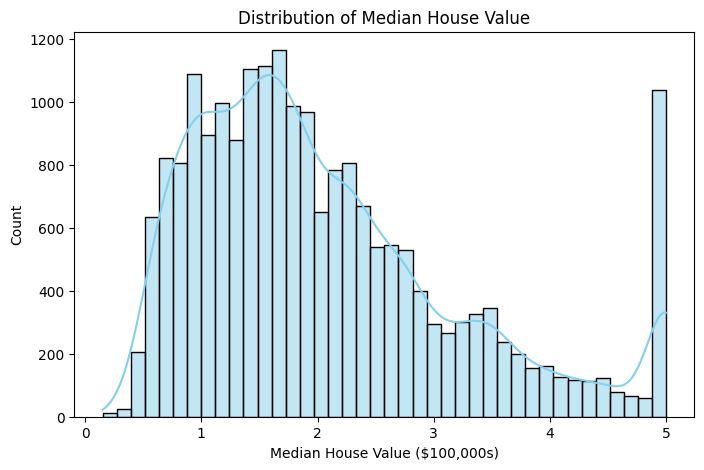

In [10]:
plt.figure(figsize=(8, 5))
sns.histplot(y, kde=True, bins=40, color="skyblue")
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value ($100,000s)")
plt.ylabel("Count")
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\california_housing\Median_House_value_distribution.png")
plt.show()


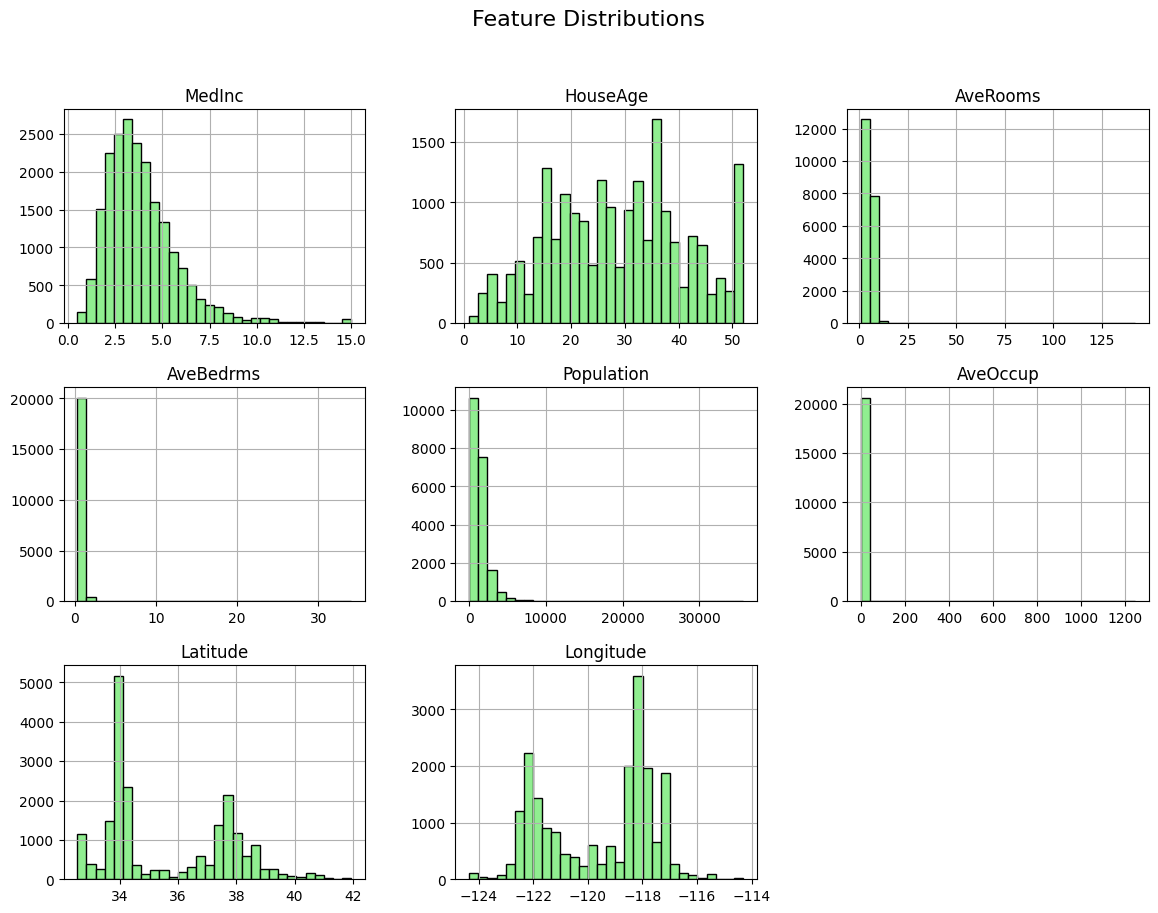

<Figure size 640x480 with 0 Axes>

In [15]:
X.hist(bins=30, figsize=(14, 10), color='lightgreen', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\california_housing\Feature_Distributions.png")



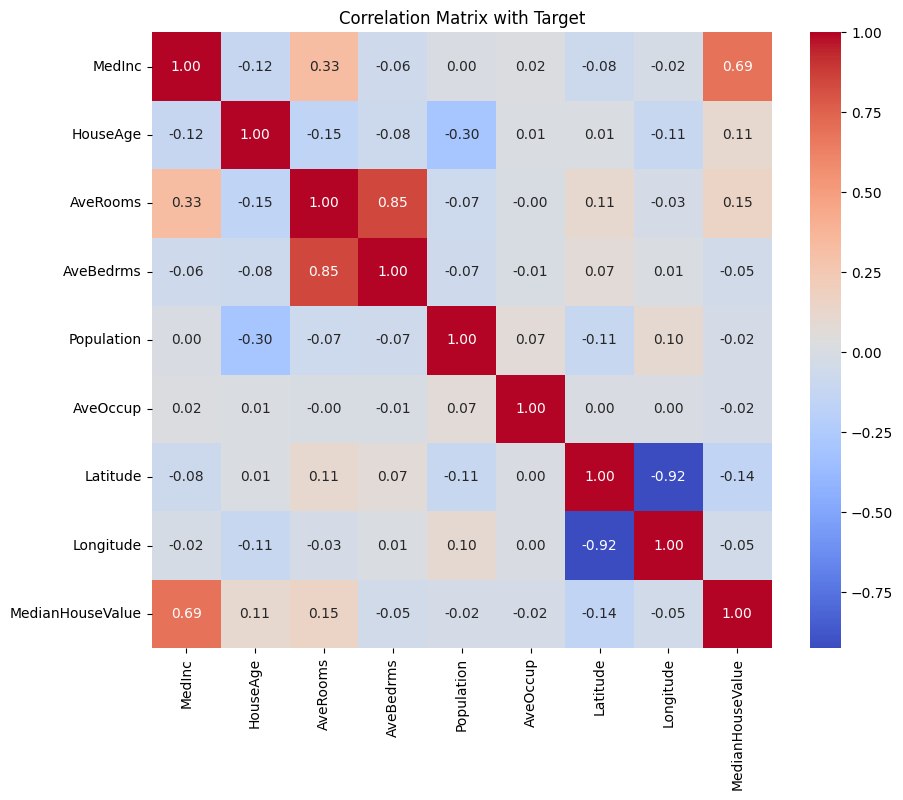

<Figure size 640x480 with 0 Axes>

In [5]:
plt.figure(figsize=(10, 8))
corr_matrix = X.join(y).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix with Target")
plt.show()
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\california_housing\Correlation_Matrix.png")


Many features in the dataset are highly skewed so preprocessing them before training the model is very important

In [10]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedianHouseValue, Length: 20640, dtype: float64

In [12]:
x_transformed=X.copy()
x_transformed['AveRooms'] = np.log1p(x_transformed['AveRooms'])
x_transformed['AveBedrms'] = np.log1p(x_transformed['AveBedrms'])
x_transformed['Population'] = np.log1p(x_transformed['Population'])
x_transformed['AveOccup'] = np.log1p(x_transformed['AveOccup'])
x_transformed

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,2.077455,0.704982,5.777652,1.268511,37.88,-122.23
1,8.3014,21.0,1.979364,0.678988,7.784057,1.134572,37.86,-122.22
2,7.2574,52.0,2.228738,0.729212,6.208590,1.335596,37.85,-122.24
3,5.6431,52.0,1.919471,0.729025,6.326149,1.266369,37.85,-122.25
4,3.8462,52.0,1.985385,0.732888,6.338594,1.157342,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,1.799307,0.757686,6.740519,1.269931,39.48,-121.09
20636,2.5568,18.0,1.962070,0.839751,5.877736,1.416534,39.49,-121.21
20637,1.7000,17.0,1.825443,0.751460,6.915723,1.201661,39.43,-121.22
20638,1.8672,18.0,1.845223,0.775611,6.609349,1.138861,39.43,-121.32


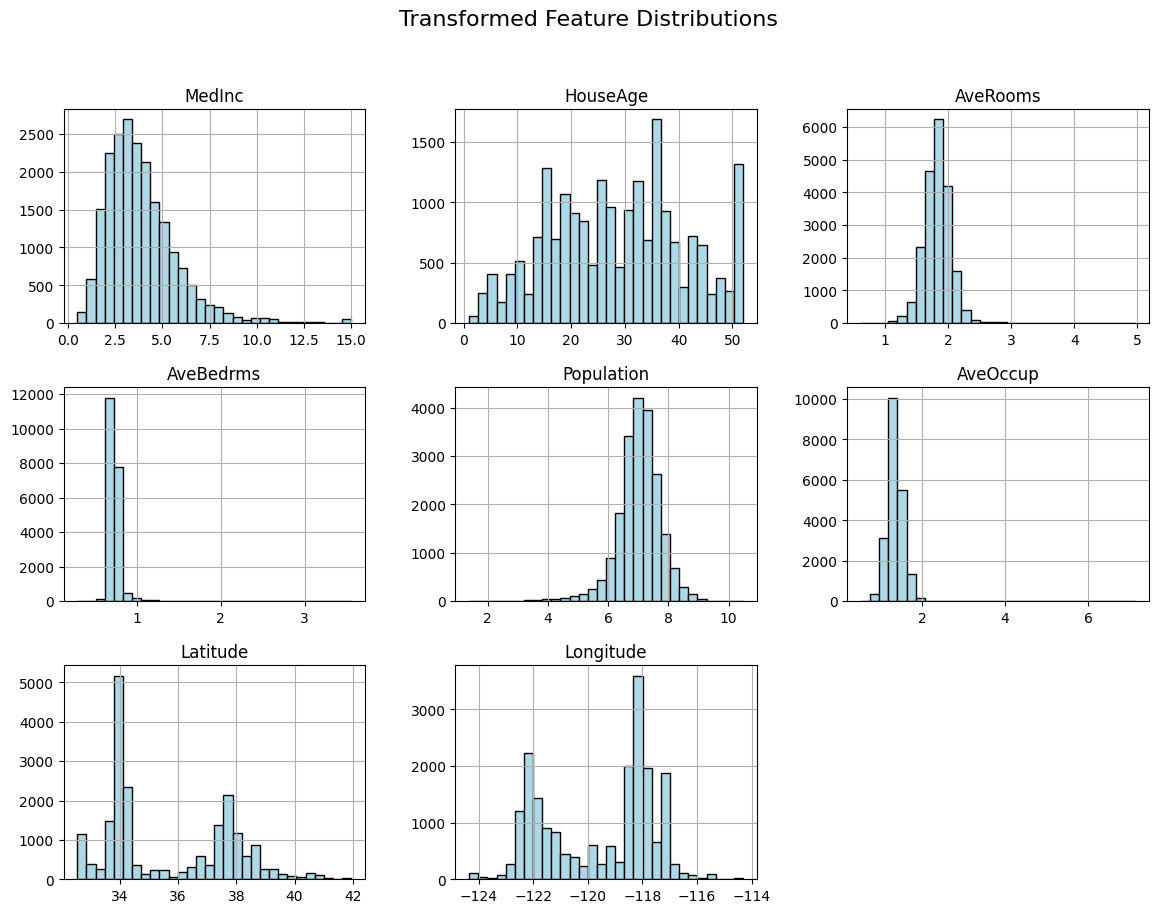

In [16]:
x_transformed.hist(bins=30, figsize=(14, 10), color='Lightblue', edgecolor='black')
plt.suptitle("Transformed Feature Distributions", fontsize=16)
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\california_housing\Transformed_Feature_Distributions.png")
plt.show()

In [ ]:
from scipy.stats import skew

print("Original skewness:", skew(X['AveOccup']))
print("Transformed skewness:", skew(np.log1p(X['AveOccup'])))
# The skewness of the 'AveOccup' feature is reduced after transformation, indicating a more normal distribution.

Original skewness: 97.63246492211677
Transformed skewness: 3.879396923810052


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transformed, y, test_size=0.2, random_state=42)
X_train


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14196,3.2596,33.0,1.794698,0.696352,7.741099,1.545819,32.71,-117.03
8267,3.8125,49.0,1.699926,0.713442,7.181592,1.007263,33.77,-118.16
17445,4.1563,4.0,1.893990,0.685679,6.820016,1.314587,34.66,-120.48
14265,1.9425,36.0,1.610001,0.709907,7.257708,1.608311,32.69,-117.11
2271,3.5542,43.0,1.983539,0.758097,6.774224,1.193922,36.78,-119.80
...,...,...,...,...,...,...,...,...
11284,6.3700,35.0,1.964175,0.655584,6.490724,1.394327,33.78,-117.96
11964,3.0500,33.0,2.062880,0.819554,7.469654,1.590098,34.02,-117.43
5390,2.9344,36.0,1.606778,0.732222,7.471363,1.466045,34.03,-118.38
860,5.7192,15.0,2.000851,0.726572,7.483244,1.430046,37.58,-121.96


In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.326196  ,  0.34849025, -0.152742  , ...,  0.92575626,
        -1.3728112 ,  1.27258656],
       [-0.03584338,  1.61811813, -0.56194311, ..., -1.63949963,
        -0.87669601,  0.70916212],
       [ 0.14470145, -1.95271028,  0.27597879, ..., -0.17564855,
        -0.46014647, -0.44760309],
       ...,
       [-0.49697313,  0.58654547, -0.9641375 , ...,  0.54577568,
        -0.75500738,  0.59946887],
       [ 0.96545045, -1.07984112,  0.7373807 , ...,  0.37430399,
         0.90651045, -1.18553953],
       [-0.68544764,  1.85617335, -1.50207929, ..., -1.034855  ,
         0.99543676, -1.41489815]])

Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
model=LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)   
print("R2:", r2_score(y_test, y_pred))

#import joblib
#joblib.dump(model, 'california_housing_model.pkl')
#print("Model saved as 'california_housing_model.pkl'")


Mean Squared Error: 0.4668537808275781
R-squared: 0.6437342932018939
Coefficients: [ 0.84730448  0.13921856 -0.17856105  0.19156913  0.04378813 -0.24988592
 -0.87857836 -0.82297674]
Intercept: 2.0719469373788773
R2: 0.6437342932018939


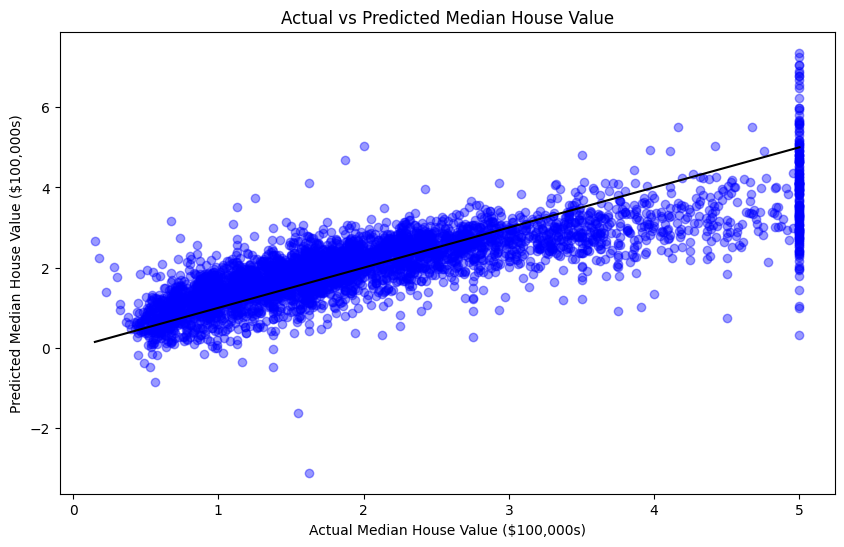

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='Black', linestyle='-')       
plt.title("Actual vs Predicted Median House Value")
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\california_housing\Linear_Regression.png")
plt.show()

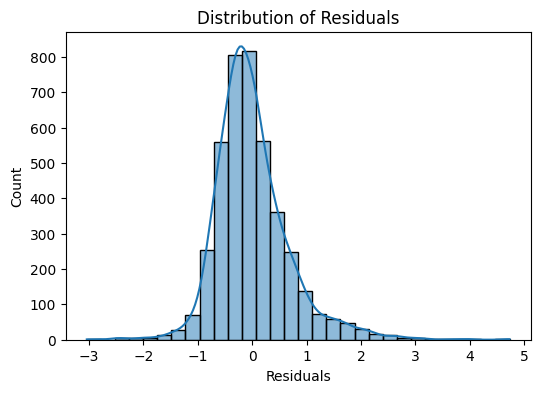

In [28]:
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, bins=30, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.show()

Decision Tree or Random Forest

Decision Tree Mean Squared Error: 0.49398273963590117
Decision Tree R-squared: 0.6230316276533556


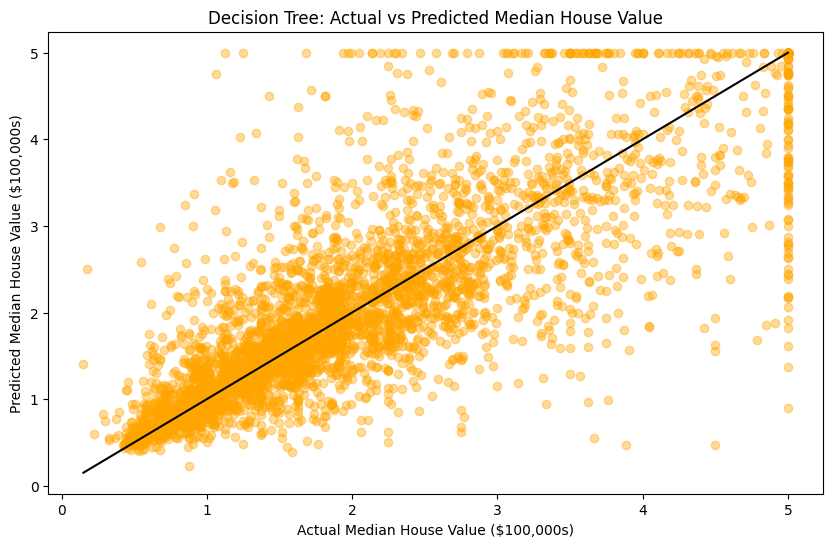

In [34]:
from sklearn.tree import DecisionTreeRegressor 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
dt=DecisionTreeRegressor(random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)
print("Decision Tree Mean Squared Error:", mean_squared_error(y_test, y_pred_dt))
print("Decision Tree R-squared:", r2_score(y_test, y_pred_dt))
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.4, color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='Black', linestyle='-')  
plt.title("Decision Tree: Actual vs Predicted Median House Value")
plt.xlabel("Actual Median House Value ($100,000s)")
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\california_housing\Decision_Tree.png")
plt.show()

Random Forest Regressor 

Random Forest Mean Squared Error: 0.25494626233196455
Random Forest R-squared: 0.8054452719988184


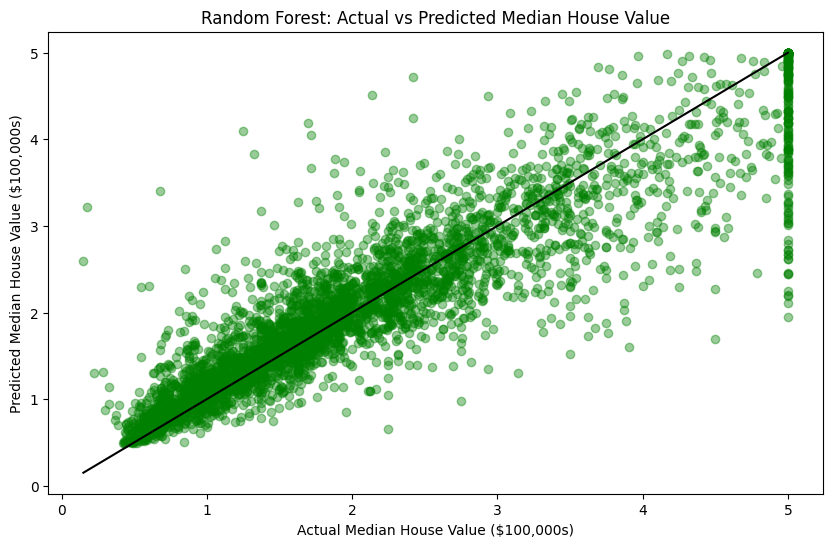

In [36]:
from sklearn.ensemble import RandomForestRegressor 
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("Random Forest R-squared:", r2_score(y_test, y_pred_rf))
plt.figure(figsize=(10, 6))     
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='green')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='Black', linestyle='-')
plt.title("Random Forest: Actual vs Predicted Median House Value")
plt.xlabel("Actual Median House Value ($100,000s)") 
plt.ylabel("Predicted Median House Value ($100,000s)")
plt.savefig(fr"C:\Users\DELL PC\Desktop\Machine Learning\Images\california_housing\Random_Forest.png")
plt.show()
